# Recap

In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt 

En nuestro último notebook, revisamos lo básico del perceptrón. 

El código que utilizamos para entrenar el perceptrón es el siguiente.

In [2]:
def step(x):
    if x<0:
        return 0
    return 1

trainingData = [
    #([input values], expected classes)
    ([0,0],0),
    ([0,1],1),
    ([1,0],1),
    ([1,1],1),
]

learningRate = 0.5

w = np.array([0, 0])
b = 0
print("weights:\t\t", w)
print("bias:\t\t\t", b)
print()

while True:
    old_w = w
    old_b = b
    
    for i in range(len(trainingData)):
        x, di = trainingData[i]
        yi = x[0] * w[0] + x[1] * w[1] + b
        error = di - step(yi)
        w = w + learningRate * error * np.array(x)
        b = b + learningRate * error

        print("x:\t", x, "\tweights:\t", b, "\t", w[0], "\t", w[1])
    
    if((old_w == w).all() and old_b == b):
        print("Success!")
        break;

weights:		 [0 0]
bias:			 0

x:	 [0, 0] 	weights:	 -0.5 	 0.0 	 0.0
x:	 [0, 1] 	weights:	 0.0 	 0.0 	 0.5
x:	 [1, 0] 	weights:	 0.0 	 0.0 	 0.5
x:	 [1, 1] 	weights:	 0.0 	 0.0 	 0.5
x:	 [0, 0] 	weights:	 -0.5 	 0.0 	 0.5
x:	 [0, 1] 	weights:	 -0.5 	 0.0 	 0.5
x:	 [1, 0] 	weights:	 0.0 	 0.5 	 0.5
x:	 [1, 1] 	weights:	 0.0 	 0.5 	 0.5
x:	 [0, 0] 	weights:	 -0.5 	 0.5 	 0.5
x:	 [0, 1] 	weights:	 -0.5 	 0.5 	 0.5
x:	 [1, 0] 	weights:	 -0.5 	 0.5 	 0.5
x:	 [1, 1] 	weights:	 -0.5 	 0.5 	 0.5
x:	 [0, 0] 	weights:	 -0.5 	 0.5 	 0.5
x:	 [0, 1] 	weights:	 -0.5 	 0.5 	 0.5
x:	 [1, 0] 	weights:	 -0.5 	 0.5 	 0.5
x:	 [1, 1] 	weights:	 -0.5 	 0.5 	 0.5
Success!


# Plotear

Si bien, el perceptrón parece funcionar, vamos a visualizar lo que hace. De esta forma podemos apoyar lo que entendemos de este.

[Source](https://stats.stackexchange.com/questions/169343/how-to-plot-the-or-function-along-with-the-decision-boundary-of-a-perceptron)

## Plot Puntos

Empezaremos por visualizar los puntos de entrada.

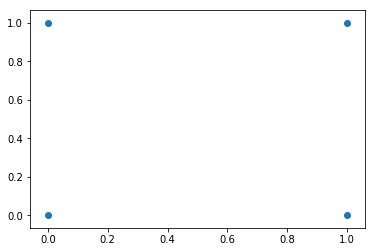

In [3]:
inputs = [i[0] for i in trainingData]
x = [i[0] for i in inputs]
y = [i[1] for i in inputs]
plt.scatter(x, y)
plt.show()

## Color a las clases

Para separar los puntos que dan resultados 0 y 1, le agregaremos color a las salidas.

Cambiamos también el [color map](https://matplotlib.org/examples/color/colormaps_reference.html) de los puntos para visualizarlos mejor.

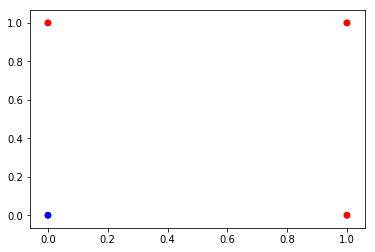

In [4]:
inputs = [i[0] for i in trainingData]
colors = [i[1] for i in trainingData]
x = [i[0] for i in inputs]
y = [i[1] for i in inputs]
plt.scatter(x, y, c=colors, cmap="bwr")
plt.show()

## Plano

Ahora dibujaremos un plano que simboliza la línea que divide nuestras clases.

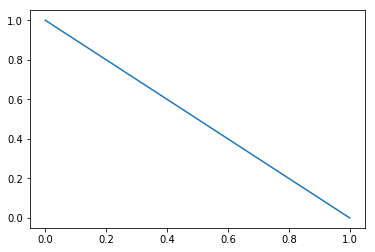

In [5]:
w1, w2 = w
x = -b / w1
y = -b / w2

d = y
c = -y / x

line_x_coords = np.array([0, x])
line_y_coords = c * line_x_coords + d

plt.plot(line_x_coords, line_y_coords)
plt.show()

## Planos y puntos

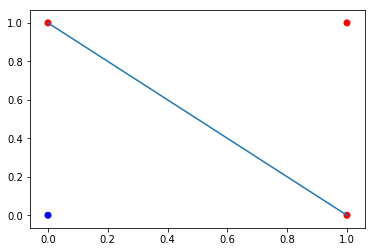

In [6]:
# Puntos:
inputs = [i[0] for i in trainingData]
colors = [i[1] for i in trainingData]
x = [i[0] for i in inputs]
y = [i[1] for i in inputs]
plt.scatter(x, y, c=colors, cmap="bwr")

w1, w2 = w
x = -b / w1
y = -b / w2

d = y
c = -y / x

line_x_coords = np.array([0, x])
line_y_coords = c * line_x_coords + d

plt.plot(line_x_coords, line_y_coords)
plt.show()

## Ajustar el tamaño del plot

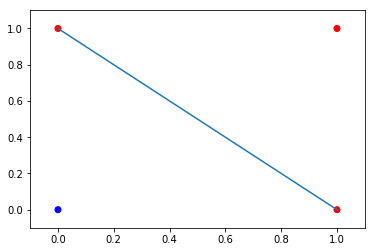

In [7]:
# Puntos:
inputs = [i[0] for i in trainingData]
colors = [i[1] for i in trainingData]
x = [i[0] for i in inputs]
y = [i[1] for i in inputs]
minX, maxX = np.array(x).min() - .1, np.array(x).max() + .1
minY, maxY = np.array(y).min() - .1, np.array(y).max() + .1

plt.ylim(minY, maxY)
plt.xlim(minX, maxX)
plt.scatter(x, y, c=colors, cmap="bwr")

w1, w2 = w
x = -b / w1
y = -b / w2

d = y
c = -y / x

line_x_coords = np.array([0, x])
line_y_coords = c * line_x_coords + d

plt.plot(line_x_coords, line_y_coords)
plt.show()

## Refactor

In [8]:
def plotPerceptron():
    # Puntos:
    inputs = [i[0] for i in trainingData]
    colors = [i[1] for i in trainingData]
    x = [i[0] for i in inputs]
    y = [i[1] for i in inputs]
    minX, maxX = np.array(x).min() - .1, np.array(x).max() + .1
    minY, maxY = np.array(y).min() - .1, np.array(y).max() + .1

    plt.ylim(minY, maxY)
    plt.xlim(minX, maxX)
    plt.scatter(x, y, c=colors, cmap="bwr")

    w1, w2 = w
    x = -b / w1
    y = -b / w2

    d = y
    c = -y / x

    line_x_coords = np.array([-1, x+1])
    line_y_coords = c * line_x_coords + d

    plt.plot(line_x_coords, line_y_coords)
    plt.show()

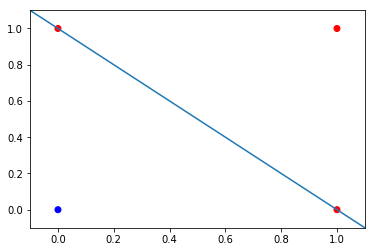

In [9]:
plotPerceptron()

# Resultados con funciones conocidas

Ahora plotearemos los puntos y las rectas para dos funciones muy conocidas: `OR` y `AND`

## OR

x:	 1.0 	weights:	 -0.2 	 0.0 	 0.0
x:	 1.0 	weights:	 0.0 	 0.0 	 0.2
x:	 1.0 	weights:	 0.0 	 0.0 	 0.2
x:	 1.0 	weights:	 0.0 	 0.0 	 0.2
x:	 1.0 	weights:	 -0.2 	 0.0 	 0.2
x:	 1.0 	weights:	 -0.2 	 0.0 	 0.2
x:	 1.0 	weights:	 0.0 	 0.2 	 0.2
x:	 1.0 	weights:	 0.0 	 0.2 	 0.2
x:	 1.0 	weights:	 -0.2 	 0.2 	 0.2
x:	 1.0 	weights:	 -0.2 	 0.2 	 0.2
x:	 1.0 	weights:	 -0.2 	 0.2 	 0.2
x:	 1.0 	weights:	 -0.2 	 0.2 	 0.2
x:	 1.0 	weights:	 -0.2 	 0.2 	 0.2
x:	 1.0 	weights:	 -0.2 	 0.2 	 0.2
x:	 1.0 	weights:	 -0.2 	 0.2 	 0.2
x:	 1.0 	weights:	 -0.2 	 0.2 	 0.2
Success!


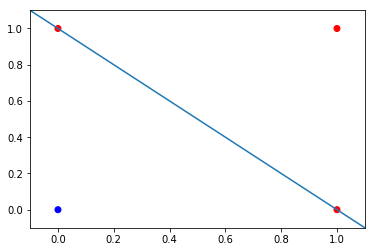

In [10]:
trainingData = [
    ([0,0],0),
    ([0,1],1),
    ([1,0],1),
    ([1,1],1),
]
learningRate = 0.2
w = [0, 0]
b = 0

while True:
    old_w = w
    old_b = b
    
    for i in range(len(trainingData)):
        xi, di = trainingData[i]
        yi = xi[0] * w[0] + xi[1] * w[1] + b
        error = di - step(yi)
        w = w + learningRate * error * np.array(xi)
        b = b + learningRate * error

        print("x:\t", x, "\tweights:\t", b, "\t", w[0], "\t", w[1])
    
    if((old_w == w).all() and old_b == b):
        print("Success!")
        plotPerceptron()
        break;

## AND

x:	 1.0 	weights:	 -0.2 	 0.0 	 0.0
x:	 1.0 	weights:	 -0.2 	 0.0 	 0.0
x:	 1.0 	weights:	 -0.2 	 0.0 	 0.0
x:	 1.0 	weights:	 0.0 	 0.2 	 0.2
x:	 1.0 	weights:	 -0.2 	 0.2 	 0.2
x:	 1.0 	weights:	 -0.4 	 0.2 	 0.0
x:	 1.0 	weights:	 -0.4 	 0.2 	 0.0
x:	 1.0 	weights:	 -0.2 	 0.4 	 0.2
x:	 1.0 	weights:	 -0.2 	 0.4 	 0.2
x:	 1.0 	weights:	 -0.4 	 0.4 	 0.0
x:	 1.0 	weights:	 -0.6000000000000001 	 0.2 	 0.0
x:	 1.0 	weights:	 -0.4000000000000001 	 0.4 	 0.2
x:	 1.0 	weights:	 -0.4000000000000001 	 0.4 	 0.2
x:	 1.0 	weights:	 -0.4000000000000001 	 0.4 	 0.2
x:	 1.0 	weights:	 -0.4000000000000001 	 0.4 	 0.2
x:	 1.0 	weights:	 -0.4000000000000001 	 0.4 	 0.2
Success!


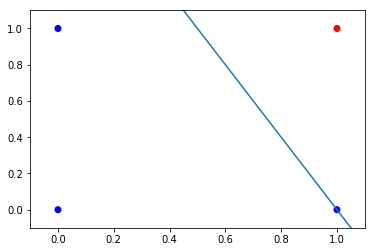

In [11]:
trainingData = [
    ([0,0],0),
    ([0,1],0),
    ([1,0],0),
    ([1,1],1),
]
learningRate = 0.2
w = [0, 0]
b = 0

while True:
    old_w = w
    old_b = b
    
    for i in range(len(trainingData)):
        xi, di = trainingData[i]
        yi = xi[0] * w[0] + xi[1] * w[1] + b
        error = di - step(yi)
        w = w + learningRate * error * np.array(xi)
        b = b + learningRate * error

        print("x:\t", x, "\tweights:\t", b, "\t", w[0], "\t", w[1])
    
    if((old_w == w).all() and old_b == b):
        print("Success!")
        plotPerceptron()
        break;